# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
 > A simple linear regression model shows/predicts the relationship between one independent variable and a dependent variable.
- What type of machine learning is linear regression?
 > Linear regression is a type of supervised machine learning.
- What is a “line of best fit” using the OLS method?
 > A "Line of best fit" using the OLS method is a line through a scatter plot of data points that best shows the relationship between those points. 
- What is the difference between correlation and regression?
 > Correlation shows the strength of a relationship between two variables and regression shows how one variable affects another.
- Describe a scenario when you would use linear regression and why you would use it.
 > You coud use linear regression to predict blood pressures of people based on things like height, weight, and amount of exercise. Linear regression would work best for this scenario because blood pressure is linearly related to height, weight, and amount of exercise.


### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity
 > The dependent variable should be linearly related to the independent variable(s).
- Normality
 > The x and y variables should be distrbuted normally.
- Homoscedasticity
 > The difference in the real and predicted values, or residuals, is constant.
- No multicollinearity
 > There should not be any correlation between the independent variables. 
- No endogeneity
 > There should not be any correlation between the independent variables and the error terms.
- No autocorrelation
 > Error terms should not be correlated to each other.

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0)
 > This is the value of the dependent variable when the independet variable is zero.
- Coefficient of Independent Variable (B1)
 > This value states how much the dependent variable should change for every change in the independent variable.
- Standard Error
 > Shows the accuracy of prdeiction for each variable.
- T-Statistic
 > This is a measure of how extreme a statisical estimate is.
- P-Value of T-Statistic (from the independent variable)
 > The vaule measures the statictical significance of an independent variable. 



### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared
 > This value can lie anywhere between 0 an 1 and incidates how much of the total variability of the dataset is explained by your regression model. 
- Adjusted R-squared
 > An adjusted value for R-squared to take into account mutiple independent variables. This value will always be smaller than R-squared.



# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [1]:
# make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
# load data
house_sales_df = pd.read_csv('house_data.csv')


### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [3]:
# explore data below (you will need to make new cells)
house_sales_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13  221900.0         3       1.00         1180   
1  6414100192  2014-12-09  538000.0         3       2.25         2570   
2  5631500400  2015-02-25  180000.0         2       1.00          770   
3  2487200875  2014-12-09  604000.0         4       3.00         1960   
4  1954400510  2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  house_condition  grade  sqft_above  \
0    5650.0     1.0           0     1                3    7.0      1180.0   
1    7242.0     2.0           0     1                3    7.0      2170.0   
2   10000.0     1.0           0     1                3    6.0       770.0   
3    5000.0     1.0           0     1                5    7.0      1050.0   
4    8080.0     1.0           0     1                3    8.0      1680.0   

   sqft_basement  year_built  zipcode      lat     long  sqft_living_15  
0              0      1955.0  98178.0  47.5112 -122.257            1340  
1            400      1951.0  98125.0  47.7210 -122.319            1690  
2              0      1933.0  98028.0  47.7379 -122.233            2720  
3            910      1965.0  98136.0  47.5208 -122.393            1360  
4              0      1987.0  98074.0  47.6168 -122.045            1800

In [4]:
house_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

In [5]:
house_sales_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.045600e+04  2.045600e+04  20456.000000  20456.000000  20456.000000   
mean   4.634802e+09  4.863355e+05      3.310422      2.032062   1942.120258   
std    2.877504e+09  2.398423e+05      0.855849      0.689049    724.345438   
min    1.000102e+06  3.209000e+03      1.000000      0.000000    370.000000   
25%    2.161850e+09  3.120000e+05      3.000000      1.500000   1390.000000   
50%    3.992700e+09  4.350000e+05      3.000000      2.000000   1840.000000   
75%    7.387500e+09  6.020000e+05      4.000000      2.500000   2410.000000   
max    9.900000e+09  1.640000e+06      6.000000      4.250000   4600.000000   

            sqft_lot        floors    waterfront          view  \
count   20456.000000  20456.000000  20456.000000  20456.000000   
mean    10302.509875      1.473455      0.004155      1.179165   
std     12700.282036      0.537955      0.064329      0.661116   
min       520.000000      1.000000      0.000000      1.000000   
25%      5000.000000      1.000000      0.000000      1.000000   
50%      7412.000000      1.000000      0.000000      1.000000   
75%     10022.250000      2.000000      0.000000      1.000000   
max    133729.000000      3.500000      1.000000      5.000000   

       house_condition         grade    sqft_above  sqft_basement  \
count     20456.000000  20456.000000  20456.000000   20456.000000   
mean          3.411322      7.514241   1679.184542     262.887808   
std           0.652286      1.026879    683.115368     390.859372   
min           1.000000      3.000000    300.000000       0.000000   
25%           3.000000      7.000000   1170.000000       0.000000   
50%           3.000000      7.000000   1500.000000       0.000000   
75%           4.000000      8.000000   2080.000000     520.000000   
max           5.000000     12.000000   3960.000000    1540.000000   

         year_built       zipcode           lat          long  sqft_living_15  
count  20456.000000  20452.000000  20456.000000  20456.000000    20456.000000  
mean    1969.985041  95297.064395     47.559194   -122.219543     1902.208594  
std       29.355600  15428.241686      0.139330      0.138576      585.143495  
min     1900.000000   9801.000000     47.155900   -122.512000      399.000000  
25%     1950.750000  98032.000000     47.467200   -122.332000     1460.000000  
50%     1972.000000  98072.000000     47.569650   -122.244500     1790.000000  
75%     1995.000000  98118.000000     47.679400   -122.134000     2260.000000  
max     2050.000000  98199.000000     47.777600   -121.315000     3790.000000

<Figure size 2160x2160 with 0 Axes>

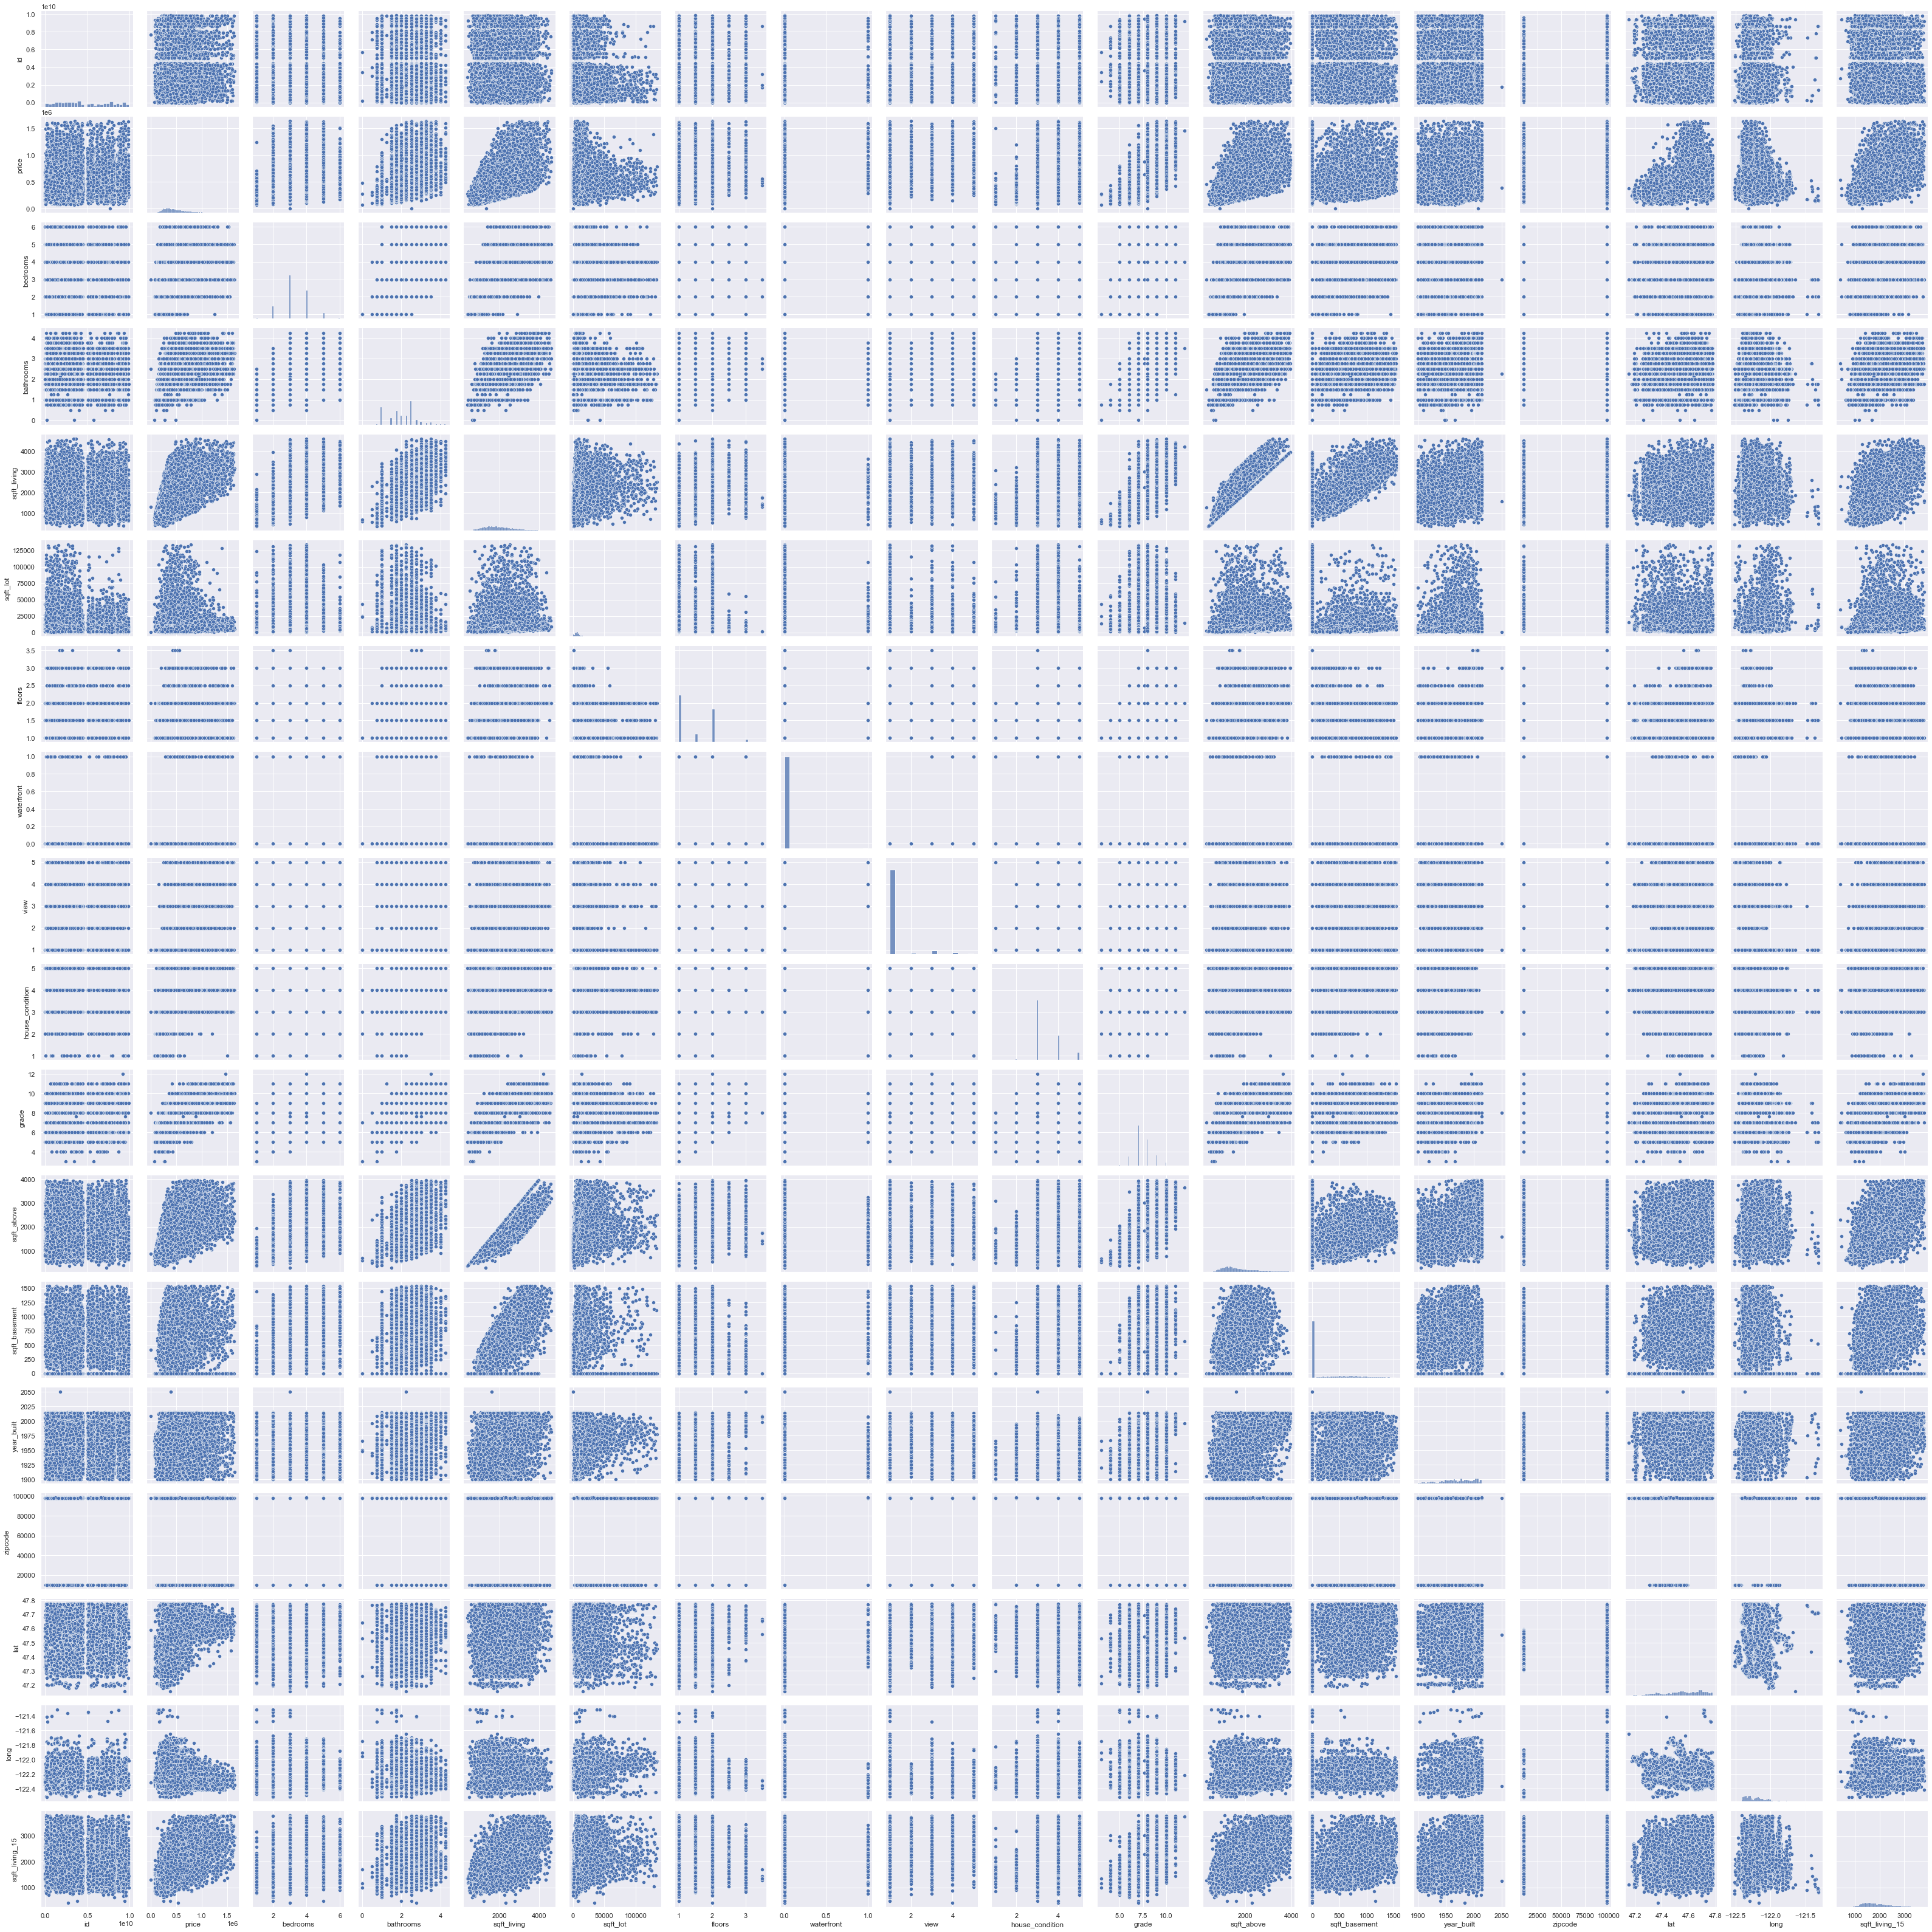

In [6]:
plt.figure(figsize=(30,30))
sns.pairplot(house_sales_df)

<AxesSubplot:>

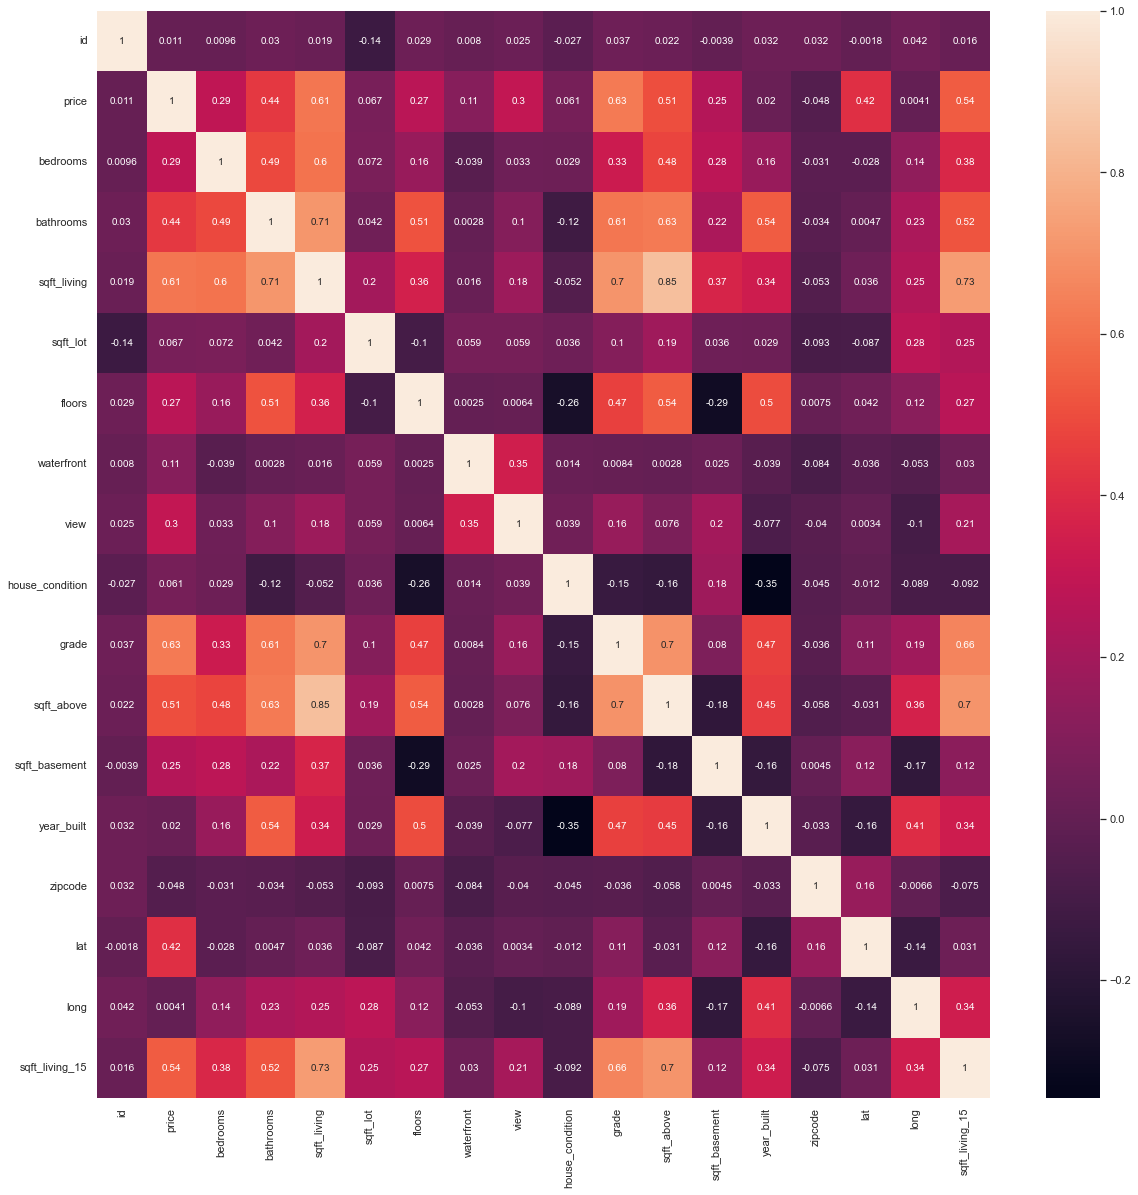

In [7]:
#This heatmap makes it easier to see that price and sqft_living and price and grade have the strongest correlation
plt.figure(figsize=(20,20))
sns.heatmap(house_sales_df.corr(), annot=True)

In [8]:
#Using pearsonr for price and sqft_living and using it again on price and grade
from scipy.stats import pearsonr

pearsonr(house_sales_df.price, house_sales_df.sqft_living)

(0.6130103952337097, 0.0)

In [9]:
pearsonr(house_sales_df.price, house_sales_df.grade)

(0.6262454260990638, 0.0)

### Step 3: Determine independent and dependent variable

In [48]:
# set X 
x1 = house_sales_df.sqft_living

# set Y 
y = house_sales_df.price


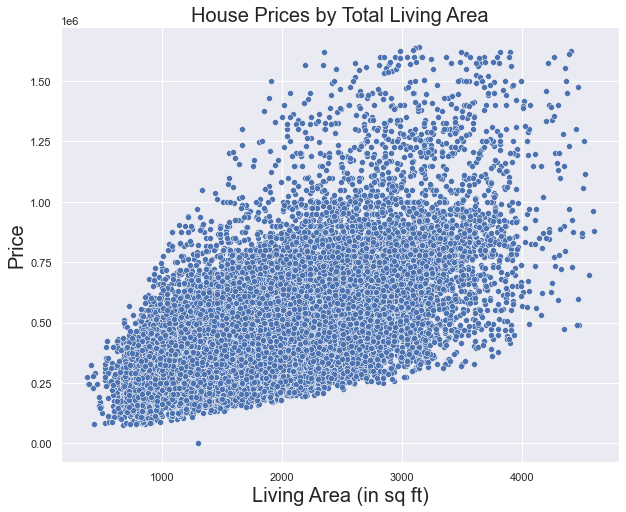

In [50]:
# visualize relationship between X and Y
plt.figure(figsize=(10,8))
sns.scatterplot(x=x1, y=y)
plt.xlabel('Living Area (in sq ft)', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.title("House Prices by Total Living Area", fontsize=20);

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [12]:
# fit model to X and Y variables (you will need to make more cells)
x=sm.add_constant(x1)
results = sm.OLS(y,x).fit()

### Step 5: Interpret Model Summary 

In [13]:
# print out and interpret model summary // terms identified below
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:25:30   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpret the following from your model:

- R-squared 
 > This model explains 37% of the variablilty. Very possibe that there may be other factors in price determination.
- Coefficient of independent variable
 > For every one unit change in sqft_living, the price is expected to change by $202.98.
- P-value of T-statistic
 > The p-value of the t-statatic is below .05 so sqft_living is statiscally significant meaning we should inculde this variable in our regression model.
- P-value of F-statistic
 > This values shows that the independent variable is significantly related the dependent variable since is it below 0.05.

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [27]:
# predict new y values (dependent variables) by feeding model new independent variable values

# using sklearn to make predictions
reg=LinearRegression()

#reshaping sqft_living values to make a 2D array
x_matrix = x1.values.reshape(-1,1)

array([[1180.],
       [   7.],
       [2570.],
       ...,
       [   8.],
       [1020.],
       [   7.]])

In [15]:
#creating fit model
reg.fit(x_matrix,y)

LinearRegression()

In [25]:
#creating new dataframe for predictions and displaying dataframe
new_data = pd.DataFrame(data=[800,2500],columns=['sqft_living'])
new_data

sqft_living
0          800
1         2500

In [17]:
#predicting price based on new values of sqft_living
## couldn't figure out how to use column name in reg.fit()
reg.predict(new_data)

C:\Users\wilks\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([254510.747858  , 599572.55760353])

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [18]:
# Pick another independent variable. Be sure to avoid multicollinearity. 
x1=house_sales_df[['sqft_living','grade']]

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [43]:
# fit new regression model (you will need to make more cells)
x=sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     8419.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:25:30   Log-Likelihood:            -2.7629e+05
No. Observations:               20456   AIC:                         5.526e+05
Df Residuals:                   20453   BIC:                         5.526e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.116e+05   1.01e+04    -40.665      0.000   -4.31e+05   -3.92e+05
sqft_living   113.2243      2.407     47.049      0.000     108.507     117.941
grade        9.023e+04   1697.513     53.153      0.000    8.69e+04    9.36e+04
==============================================================================
Omnibus:                     4053.224   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9767.719
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.558   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared 
 > This model explains 45% of the variability.
- Adjusted R-squared
 > This is just .001 less than R-squared and takes into account the addition of an independent variable. This model explains 45% of the variability.
- Coefficient of independent variables
 > For every one unit change in sqft_living, the price is expected to change by $113.22. In addition, for every one unit change in grade, price is expected to change by $90,230. 
- P-value of T-statistic
 > The p-value of the t-statatic is below .05 so sqft_living and grade are statiscally significant meaning we should inculde these variable in our regression model. 
- P-value of F-statistic
This values shows that the independent variables are significantly related the dependent variable since is it below 0.05.



If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [46]:
# predict new y values (dependent variables) by feeding model new independent variable values
new_data = pd.DataFrame(data=[[1,800,6],[1,2500,7],[1,3000,8],[1,900,4]],columns=['constant','sqft_living','grades'])
new_data


constant  sqft_living  grades
0         1          800       6
1         1         2500       7
2         1         3000       8
3         1          900       4

In [45]:
results.predict(new_data)

0    220392.055674
1    503101.821890
2    649942.473231
dtype: float64

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [22]:
# create new markdown cell and write down your observations
With 


# Part 4 - Multivariate Time Series Analysis

In [23]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 